In [1]:

# %%
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator  # add this import
import scienceplots
plt.style.use(['science', 'no-latex'])
import pandas as pd
import numpy as np

RESULTS_DIR = Path("results")

# Load FRCNN history
with open(RESULTS_DIR / "frcnn_history.json") as f:
    frcnn_hist = json.load(f)
# drop epoch 0
# frcnn_hist = [e for e in frcnn_hist if e.get("epoch", 0) != 0]

# Load DETR history
with open(RESULTS_DIR / "detr_hf_history.json") as f:
    detr_hist = json.load(f)
# drop epoch 0
# detr_hist = [e for e in detr_hist if e.get("epoch", 0) != 0]

# Load YOLO history
with open(RESULTS_DIR / "yolo_history.json") as f:
    yolo_hist = json.load(f)
# drop epoch 0
# yolo_hist = [e for e in yolo_hist if e.get("epoch", 0) != 0]


# # YOLO training curve (per-epoch) if available
# yolo_results_csv = RESULTS_DIR / "yolov8_results.csv"
# yolo_df = pd.read_csv(yolo_results_csv) if yolo_results_csv.exists() else None

# frcnn_hist, detr_hist, yolo_hist, (yolo_df.head() if yolo_df is not None else None)


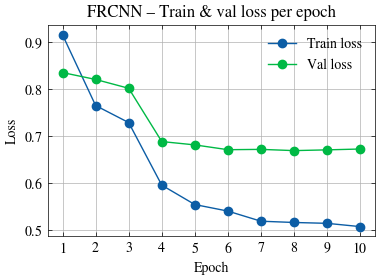

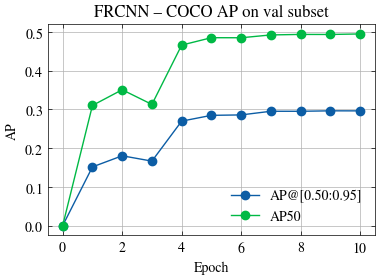

In [2]:
# %%
frcnn_epochs = [e["epoch"] for e in frcnn_hist]
frcnn_train_loss = [e.get("train_loss") for e in frcnn_hist]
frcnn_val_loss = [e.get("val_loss") for e in frcnn_hist]
frcnn_ap = [e.get("AP") for e in frcnn_hist]
frcnn_ap50 = [e.get("AP50") for e in frcnn_hist]

plt.figure(figsize=(4, 3))
plt.plot(frcnn_epochs, frcnn_train_loss, marker="o", label="Train loss")
plt.plot(frcnn_epochs, frcnn_val_loss, marker="o", label="Val loss")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("FRCNN – Train & val loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/FRCNN-loss.pdf", dpi=300)
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(frcnn_epochs, frcnn_ap, marker="o", label="AP@[0.50:0.95]")
plt.plot(frcnn_epochs, frcnn_ap50, marker="o", label="AP50")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("FRCNN – COCO AP on val subset")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/FRCNN-AP.pdf", dpi=300)
plt.show()


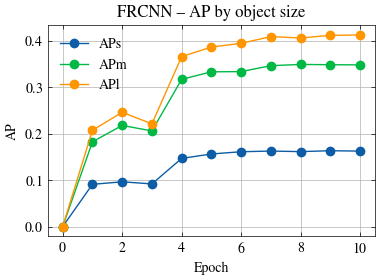

In [3]:

# %%
plt.figure(figsize=(4, 3))
plt.plot(frcnn_epochs, [e.get("APs") for e in frcnn_hist], marker="o", label="APs")
plt.plot(frcnn_epochs, [e.get("APm") for e in frcnn_hist], marker="o", label="APm")
plt.plot(frcnn_epochs, [e.get("APl") for e in frcnn_hist], marker="o", label="APl")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("FRCNN – AP by object size")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/FRCNN-APS.pdf", dpi=300)
plt.show()


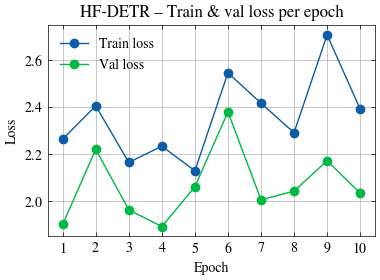

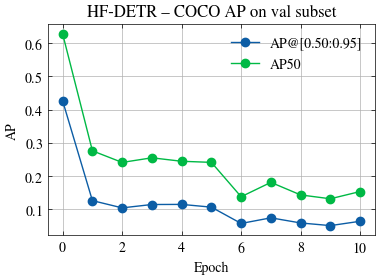

In [4]:
# %%
detr_epochs = [e["epoch"] for e in detr_hist]
detr_train_loss = [e.get("train_loss") for e in detr_hist]
detr_val_loss = [e.get("val_loss") for e in detr_hist]
detr_ap = [e.get("AP") for e in detr_hist]
detr_ap50 = [e.get("AP50") for e in detr_hist]

plt.figure(figsize=(4, 3))
plt.plot(detr_epochs, detr_train_loss, marker="o", label="Train loss")
plt.plot(detr_epochs, detr_val_loss, marker="o", label="Val loss")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("HF-DETR – Train & val loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/DETR-loss.pdf", dpi=300)
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(detr_epochs, detr_ap, marker="o", label="AP@[0.50:0.95]")
plt.plot(detr_epochs, detr_ap50, marker="o", label="AP50")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("HF-DETR – COCO AP on val subset")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/DETR-AP.pdf", dpi=300)
plt.show()


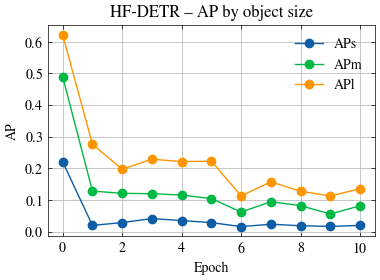

In [5]:
# %%
plt.figure(figsize=(4, 3))
plt.plot(detr_epochs, [e.get("APs") for e in detr_hist], marker="o", label="APs")
plt.plot(detr_epochs, [e.get("APm") for e in detr_hist], marker="o", label="APm")
plt.plot(detr_epochs, [e.get("APl") for e in detr_hist], marker="o", label="APl")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("HF-DETR – AP by object size")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/DETR-APS.pdf", dpi=300)
plt.show()


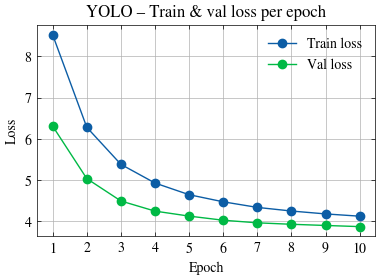

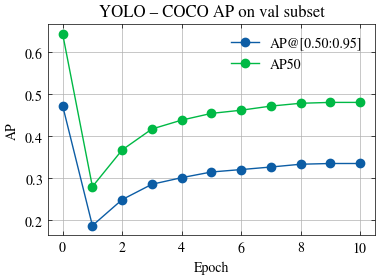

In [6]:
# %%
yolo_epochs = [e["epoch"] for e in yolo_hist]
yolo_train_loss = [e.get("train_loss") for e in yolo_hist]
yolo_val_loss = [e.get("val_loss") for e in yolo_hist]
yolo_ap = [e.get("AP") for e in yolo_hist]
yolo_ap50 = [e.get("AP50") for e in yolo_hist]

plt.figure(figsize=(4, 3))
plt.plot(yolo_epochs, yolo_train_loss, marker="o", label="Train loss")
plt.plot(yolo_epochs, yolo_val_loss, marker="o", label="Val loss")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("YOLO – Train & val loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/YOLO-loss.pdf", dpi=300)
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(yolo_epochs, yolo_ap, marker="o", label="AP@[0.50:0.95]")
plt.plot(yolo_epochs, yolo_ap50, marker="o", label="AP50")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("YOLO – COCO AP on val subset")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/YOLO-AP.pdf", dpi=300)
plt.show()


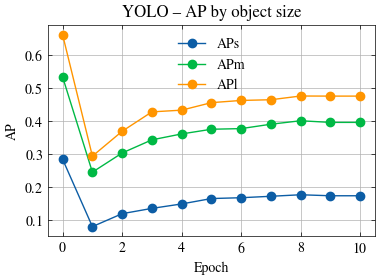

In [7]:
# %%
plt.figure(figsize=(4, 3))
plt.plot(yolo_epochs, [e.get("APs") for e in yolo_hist], marker="o", label="APs")
plt.plot(yolo_epochs, [e.get("APm") for e in yolo_hist], marker="o", label="APm")
plt.plot(yolo_epochs, [e.get("APl") for e in yolo_hist], marker="o", label="APl")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # integer major ticks 
ax.minorticks_off()                                    # remove all minor ticks
plt.title("YOLO – AP by object size")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/YOLO-APS.pdf", dpi=300)
plt.show()


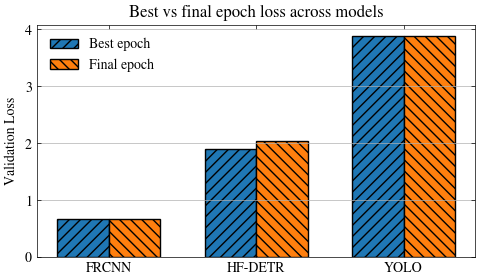

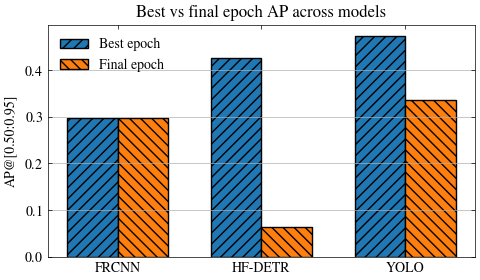

In [8]:
# %% helper functions

def get_loss_value(entry):
    """Prefer val_loss, then train_loss; may return None."""
    loss = entry.get("val_loss")
    if loss is None:
        loss = entry.get("train_loss")
    return loss


def get_loss_value_safe(entry, default=0.0):
    """Same as get_loss_value, but always returns a float for plotting."""
    loss = get_loss_value(entry)
    return float(loss) if loss is not None else float(default)


def get_best_and_final_for_loss(hist):
    """
    Best & final *for loss*:
      - Ignore epoch 0 (pre-training).
      - Best = smallest loss.
      - Final = largest epoch index among epochs >= 1.
    """
    # Only epochs 1+
    candidates = [e for e in hist if e.get("epoch", 0) >= 1]
    if not candidates:  # Fallback if something is weird
        candidates = hist

    # Entries that actually have a loss
    with_loss = [e for e in candidates if get_loss_value(e) is not None]
    if not with_loss:
        with_loss = candidates

    # Final: latest epoch among those with loss
    final_entry = max(with_loss, key=lambda e: e["epoch"])
    # Best: smallest loss
    best_entry = min(with_loss, key=lambda e: get_loss_value(e))

    return best_entry, final_entry


def get_best_and_final_for_ap(hist):
    """
    Best & final *for AP*:
      - Epoch 0 IS allowed.
      - Best = highest AP over all epochs with AP not None.
      - Final = largest epoch index overall.
    """
    final_entry = max(hist, key=lambda e: e["epoch"])

    with_ap = [e for e in hist if e.get("AP") is not None]
    if with_ap:
        best_entry = max(with_ap, key=lambda e: e["AP"])
    else:
        best_entry = final_entry

    return best_entry, final_entry


def get_ap_value_safe(entry, default=0.0):
    """Return AP as float, falling back to default if None."""
    ap = entry.get("AP")
    return float(ap) if ap is not None else float(default)


# %% compute best/final entries

# LOSS-based (ignore epoch 0)
frcnn_best_loss, frcnn_final_loss = get_best_and_final_for_loss(frcnn_hist)
detr_best_loss,  detr_final_loss  = get_best_and_final_for_loss(detr_hist)
yolo_best_loss,  yolo_final_loss  = get_best_and_final_for_loss(yolo_hist)

# AP-based (include epoch 0)
frcnn_best_ap, frcnn_final_ap = get_best_and_final_for_ap(frcnn_hist)
detr_best_ap,  detr_final_ap  = get_best_and_final_for_ap(detr_hist)
yolo_best_ap,  yolo_final_ap  = get_best_and_final_for_ap(yolo_hist)

models = ["FRCNN", "HF-DETR", "YOLO"]

# Values for LOSS plot
best_losses = [
    get_loss_value_safe(frcnn_best_loss),
    get_loss_value_safe(detr_best_loss),
    get_loss_value_safe(yolo_best_loss),
]
final_losses = [
    get_loss_value_safe(frcnn_final_loss),
    get_loss_value_safe(detr_final_loss),
    get_loss_value_safe(yolo_final_loss),
]

# Values for AP plot
best_aps = [
    get_ap_value_safe(frcnn_best_ap),
    get_ap_value_safe(detr_best_ap),
    get_ap_value_safe(yolo_best_ap),
]
final_aps = [
    get_ap_value_safe(frcnn_final_ap),
    get_ap_value_safe(detr_final_ap),
    get_ap_value_safe(yolo_final_ap),
]

# %% PLOT 1: grouped bar plot for loss (best vs final) across models

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(5, 3))
bars_best = ax.bar(
    x - width / 2,
    best_losses,
    width,
    label="Best epoch",
    color="tab:blue",
    hatch="///",
    edgecolor="black",
)
bars_final = ax.bar(
    x + width / 2,
    final_losses,
    width,
    label="Final epoch",
    color="tab:orange",
    hatch="\\\\\\",
    edgecolor="black",
)

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Validation Loss")
ax.set_title("Best vs final epoch loss across models")
ax.minorticks_off()
ax.grid(True, axis="y")
ax.legend()
plt.tight_layout()
plt.savefig("plots/Overall-loss.pdf", dpi=300)
plt.show()

# %% PLOT 2: grouped bar plot for AP@[0.50:0.95] (best vs final) across models

fig, ax = plt.subplots(figsize=(5, 3))
bars_best_ap = ax.bar(
    x - width / 2,
    best_aps,
    width,
    label="Best epoch",
    color="tab:blue",
    hatch="///",
    edgecolor="black",
)
bars_final_ap = ax.bar(
    x + width / 2,
    final_aps,
    width,
    label="Final epoch",
    color="tab:orange",
    hatch="\\\\\\",
    edgecolor="black",
)

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("AP@[0.50:0.95]")
ax.set_title("Best vs final epoch AP across models")
ax.minorticks_off()
ax.grid(True, axis="y")
ax.legend()
plt.tight_layout()
plt.savefig("plots/Overall-AP.pdf", dpi=300)
plt.show()